<a href="https://www.kaggle.com/code/mdromzanalom/r-avps-p?scriptVersionId=158721744" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ------------------------------ Start Program ------------------------------

# Library Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, roc_curve, roc_auc_score
from scipy.sparse import hstack
import time

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_20/1563234269.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

# Dataset Loading

In [2]:
# Load the CSV file
data = pd.read_csv('/kaggle/input/dataset-for-avp/AVPs_Dataset.csv')
data.head()

,Sequence,Protective antigenic score,Probable prediction (antigen/non antigen) Threshold = 0.4,Property
0,GKPRPYSPRPTSHPRPIRV,0.5017,ANTIGEN,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,0.4636,ANTIGEN,1
2,FLFPLITSFLSKVL,0.4303,ANTIGEN,1
3,SNDIYFNFQR,0.5745,ANTIGEN,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,0.4590,ANTIGEN,1


In [3]:
data.tail()

,Sequence,Protective antigenic score,Probable prediction (antigen/non antigen) Threshold = 0.4,Property
878,DDNGKPYVLPSVRTCGFDFTGAVEDISK,0.1376,NON-ANTIGEN,0
879,RQLNPSSQELQSPQQSYLQQPYPQNPYL,0.3428,NON-ANTIGEN,0
880,PCDPGPQKFFSFGTKTLYQSIDAPQSKFF,0.3430,NON-ANTIGEN,0
881,EALVYTFLLIGTLGIIFFAIFFREPPRIVR,0.3777,NON-ANTIGEN,0
882,EALVYTFLLVGTLGIIFFSIFFREPPRIIK,0.2872,NON-ANTIGEN,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Sequence                                                   883 non-null    object 
 1   Protective antigenic score                                 883 non-null    float64
 2   Probable prediction (antigen/non antigen) Threshold = 0.4  883 non-null    object 
 3   Property                                                   883 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 27.7+ KB


In [5]:
data["Protective antigenic score"].describe()

count    883.000000
mean       0.512053
std        0.401690
min       -0.943700
25%        0.293700
50%        0.466200
75%        0.706500
max        4.194100
Name: Protective antigenic score, dtype: float64

# Class Distribution where 1 shows AVP and 0 shows non AVP

Property
1    514
0    369
Name: count, dtype: int64


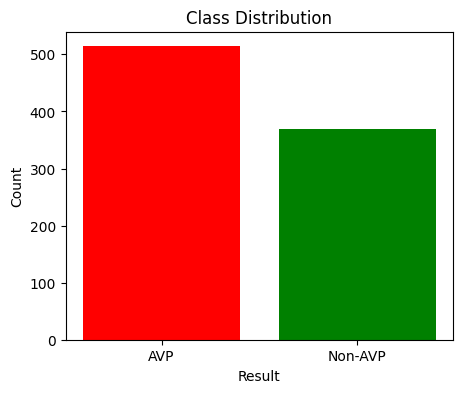

In [6]:
# Count the number of instances in each class
class_counts = data['Property'].value_counts()
print(class_counts)
# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Class Distribution')
#beingsaved.savefig('/kaggle/working/Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

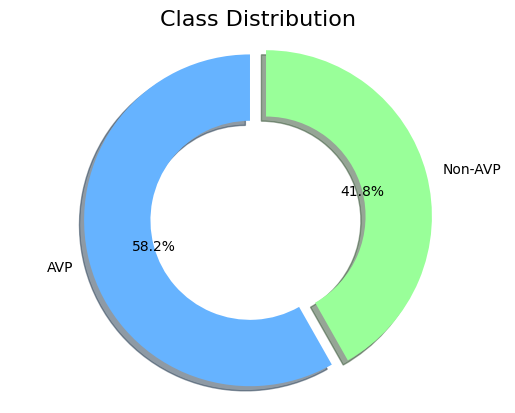

In [7]:
colors = ['#66b3ff', '#99ff99']
explode = (0, 0.1)
plt.pie(data['Property'].value_counts(), labels=['AVP', 'Non-AVP'], autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.4), colors=colors, explode=explode, shadow=True)
fig = plt.gcf()
plt.axis('equal')
plt.title('Class Distribution', fontsize=16)
plt.show()

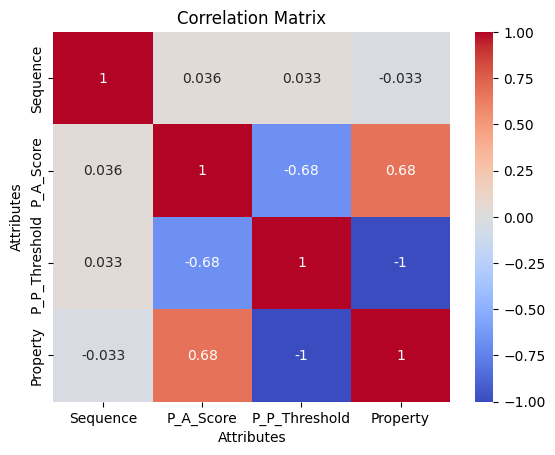

In [8]:
# Select the features and labels
Attributes = data[['Sequence', 'Protective antigenic score', 'Probable prediction (antigen/non antigen) Threshold = 0.4','Property']]

# Convert non-numeric columns to numeric using label encoding
label_encoder = LabelEncoder()
for column in Attributes.columns:
    if Attributes[column].dtype == object:
        Attributes[column] = label_encoder.fit_transform(Attributes[column])

# Modify column names
Attributes.rename(columns={'Protective antigenic score': 'P_A_Score', 'Probable prediction (antigen/non antigen) Threshold = 0.4': 'P_P_Threshold'}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = Attributes.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the axis labels and title
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.title('Correlation Matrix')

# Display the correlation matrix
plt.show()

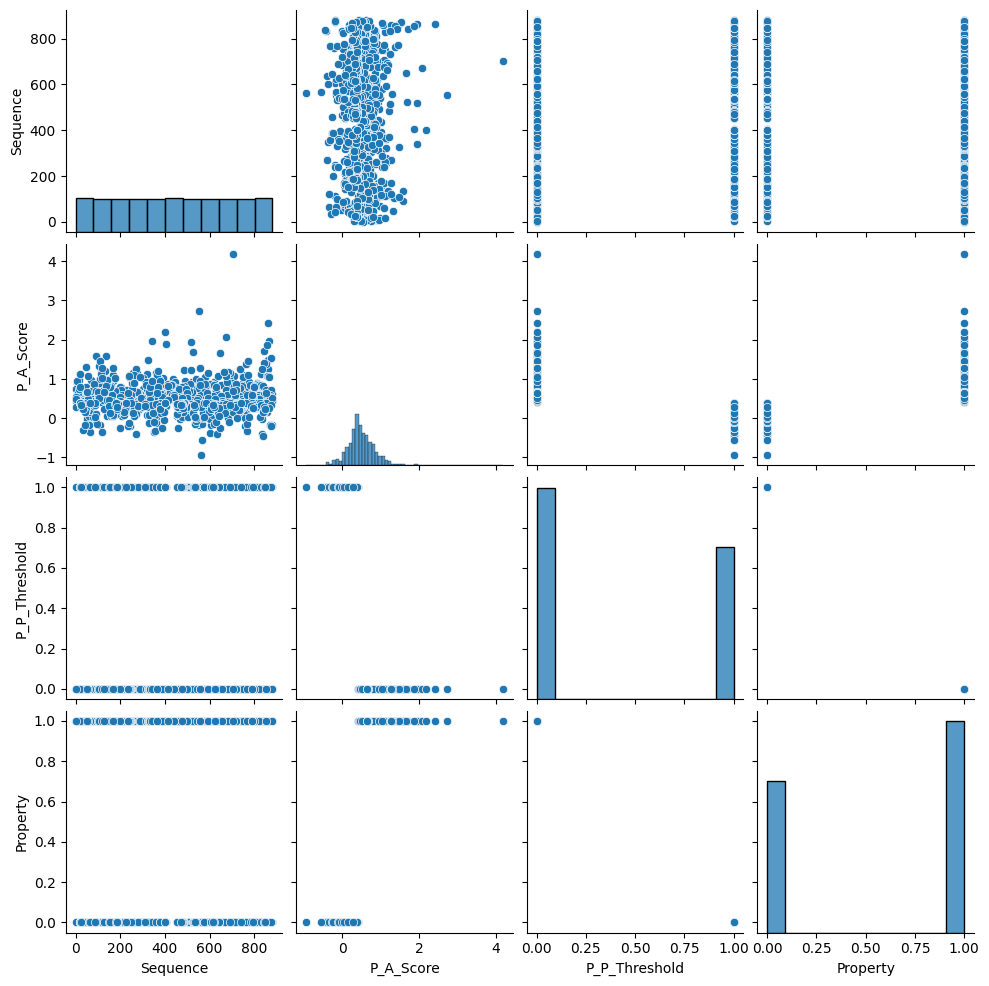

In [9]:
# Generate the pairplot
pairplot = sns.pairplot(Attributes)

# Save the pairplot as an image file
#pairplot.savefig('pairplot.png')

# Show the pairplot
plt.show()

In [10]:
data.head()

,Sequence,Protective antigenic score,Probable prediction (antigen/non antigen) Threshold = 0.4,Property
0,GKPRPYSPRPTSHPRPIRV,0.5017,ANTIGEN,1
1,ACYCRIPACIAGERRYGTCIYQGRLWAFCC,0.4636,ANTIGEN,1
2,FLFPLITSFLSKVL,0.4303,ANTIGEN,1
3,SNDIYFNFQR,0.5745,ANTIGEN,1
4,GLFSVLGAVAKHVLPHVVPVIAEKL,0.4590,ANTIGEN,1


# Overview of Dataset

In [11]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Pre-processing

In [12]:
data.shape

(883, 4)

In [13]:
#Check the null value
data.isna().sum()

Sequence                                                     0
Protective antigenic score                                   0
Probable prediction (antigen/non antigen) Threshold = 0.4    0
Property                                                     0
dtype: int64

In [14]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Sequence                                                   883 non-null    object 
 1   Protective antigenic score                                 883 non-null    float64
 2   Probable prediction (antigen/non antigen) Threshold = 0.4  883 non-null    object 
 3   Property                                                   883 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 27.7+ KB


# Features and labels selection

In [15]:
# Split the data into features and labels
features = data[['Sequence', 'Protective antigenic score', 'Probable prediction (antigen/non antigen) Threshold = 0.4']]
labels = data['Property']

# Splitting dataset

In [16]:
# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# Data Distribution of train set and test set

Property
1    403
0    303
Name: count, dtype: int64


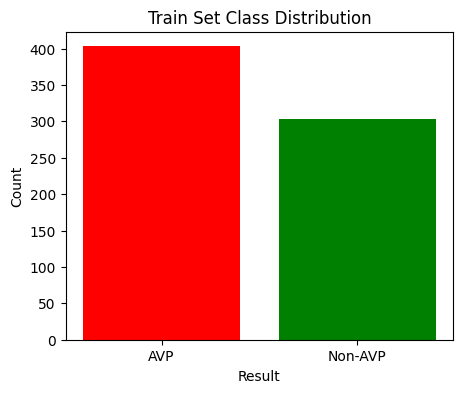

In [17]:
# Count the number of instances in each class
import matplotlib.pyplot as plt
class_counts = labels_train.value_counts()
print(class_counts)
# Plot the class distribution
# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Train Set Class Distribution')
#beingsaved.savefig('/kaggle/working/Before_Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

Property
1    111
0     66
Name: count, dtype: int64


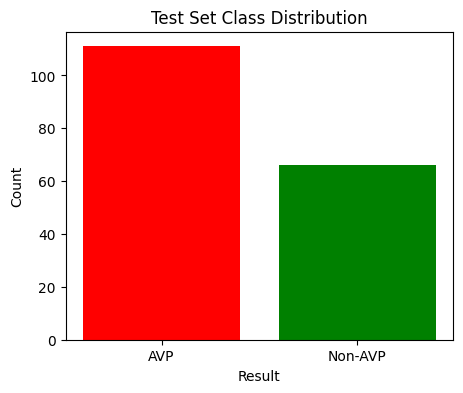

In [18]:
# Count the number of instances in each class
import matplotlib.pyplot as plt
class_counts = labels_test.value_counts()
print(class_counts)
# Plot the class distribution
# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Test Set Class Distribution')
#beingsaved.savefig('/kaggle/working/Before_Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

In [19]:

# Convert sequences to numerical features using a vectorizer
vectorizer = CountVectorizer()
sequence_train_transformed = vectorizer.fit_transform(features_train['Sequence'])
sequence_test_transformed = vectorizer.transform(features_test['Sequence'])

# Convert 'Protective antigenic score' to a sparse matrix
score_train = features_train['Protective antigenic score'].values.reshape(-1, 1)
score_test = features_test['Protective antigenic score'].values.reshape(-1, 1)

# Perform one-hot encoding on 'Probable prediction (antigen/non antigen) Threshold = 0.4'
encoder = OneHotEncoder(sparse=False)
prediction_train = encoder.fit_transform(features_train['Probable prediction (antigen/non antigen) Threshold = 0.4'].values.reshape(-1, 1))
prediction_test = encoder.transform(features_test['Probable prediction (antigen/non antigen) Threshold = 0.4'].values.reshape(-1, 1))

# Concatenate the transformed features
features_train_transformed = hstack((sequence_train_transformed, score_train, prediction_train))
features_test_transformed = hstack((sequence_test_transformed, score_test, prediction_test))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Balance the dataset

In [20]:
# Train set balance
smote = SMOTE()
features_train_transformed_balanced, labels_train_balanced = smote.fit_resample(features_train_transformed, labels_train)

Property
0    403
1    403
Name: count, dtype: int64


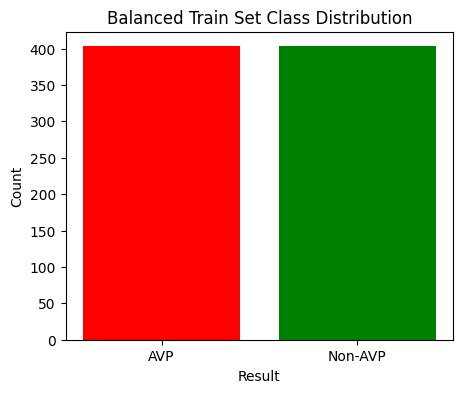

In [21]:
# Count the number of instances in each class
import matplotlib.pyplot as plt
class_counts = labels_train_balanced.value_counts()
print(class_counts)
# Plot the class distribution
# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Balanced Train Set Class Distribution')
#beingsaved.savefig('/kaggle/working/Before_Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

In [22]:
#Test set Balance
features_test_transformed_balanced, labels_test_balanced = smote.fit_resample(features_test_transformed, labels_test)

Property
1    111
0    111
Name: count, dtype: int64


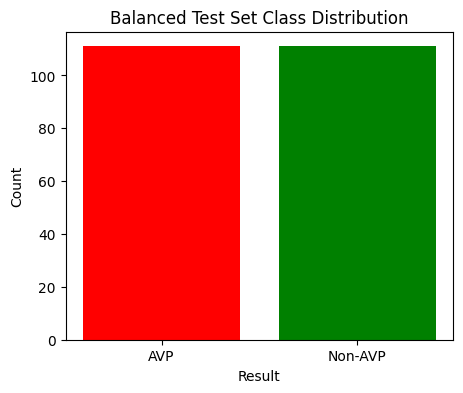

In [23]:
# Count the number of instances in each class
import matplotlib.pyplot as plt
class_counts = labels_test_balanced.value_counts()
print(class_counts)

# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['AVP', 'Non-AVP'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Balanced Test Set Class Distribution')
#beingsaved.savefig('/kaggle/working/Before_Class_Distribution.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# All Model Train and evaluate

Model: SVM
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]


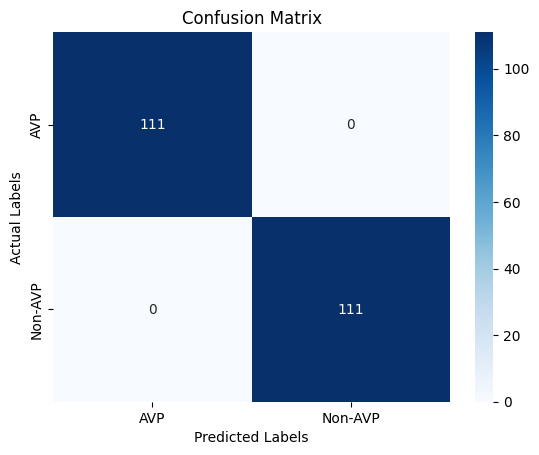

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0


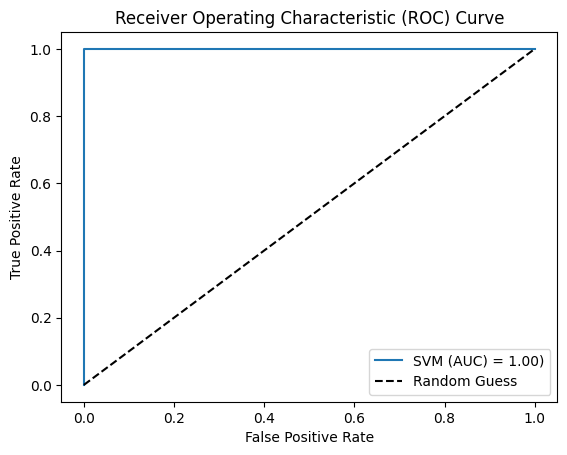

Execution Time: 0.013666629791259766 seconds
---------------------------------------
Model: Decision Tree
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]


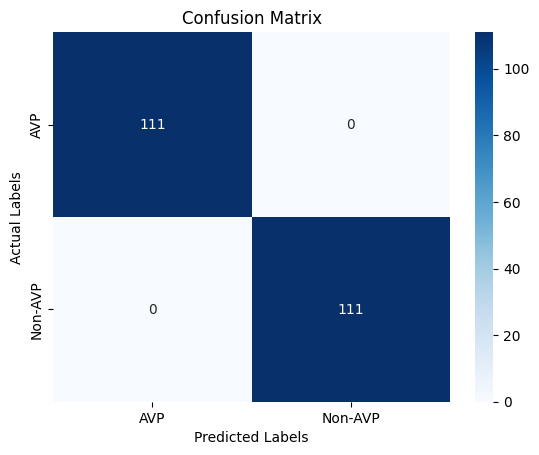

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0


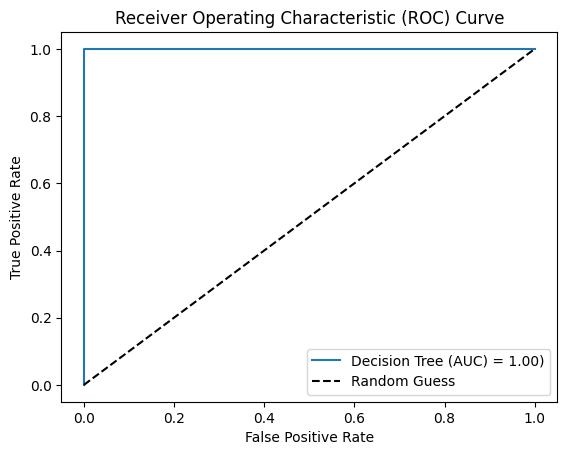

Execution Time: 0.004889726638793945 seconds
---------------------------------------
Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]


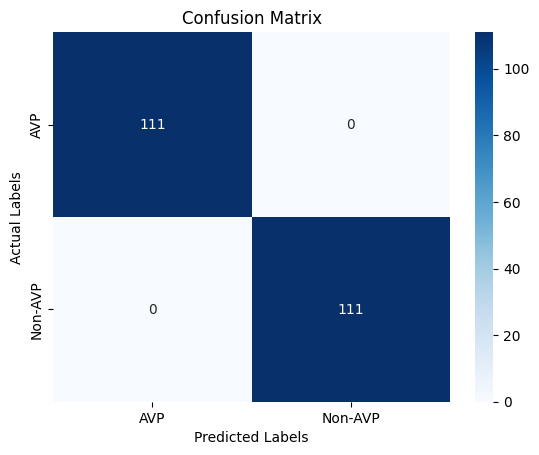

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0


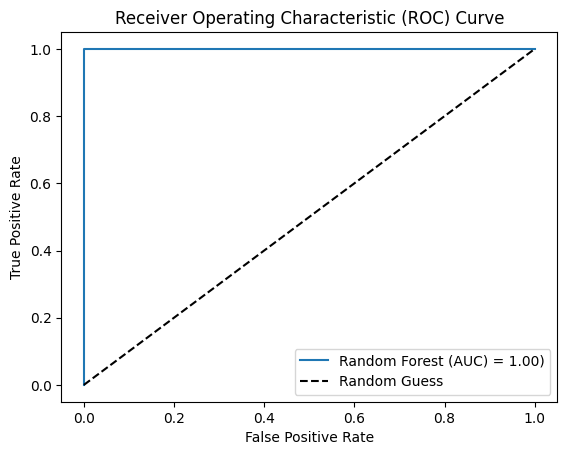

Execution Time: 0.2526118755340576 seconds
---------------------------------------
Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]


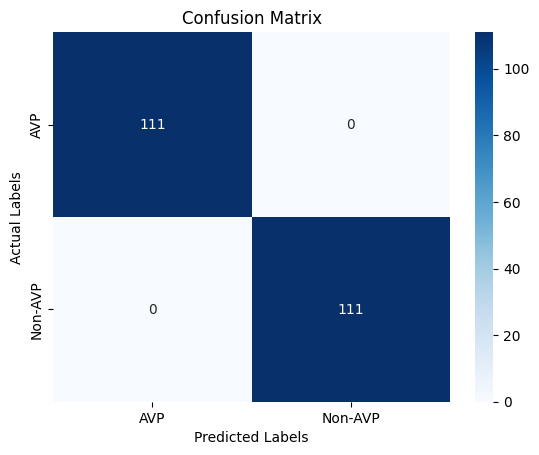

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0


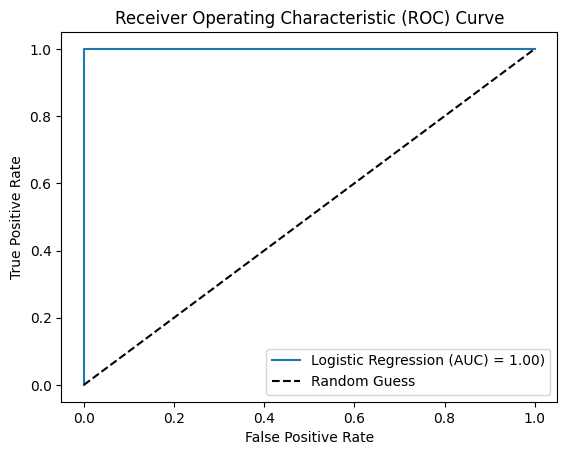

Execution Time: 0.023851871490478516 seconds
---------------------------------------
Model: Gradient Boosting
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]


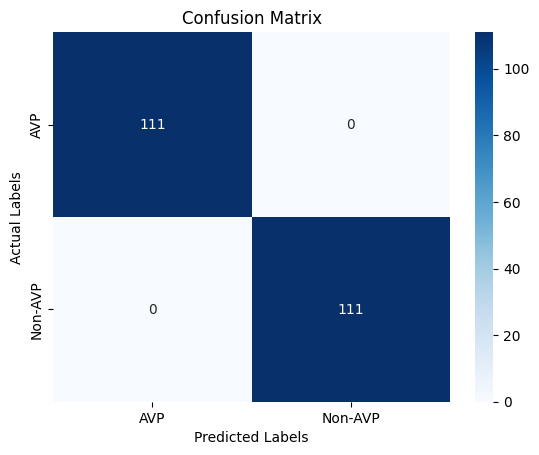

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0


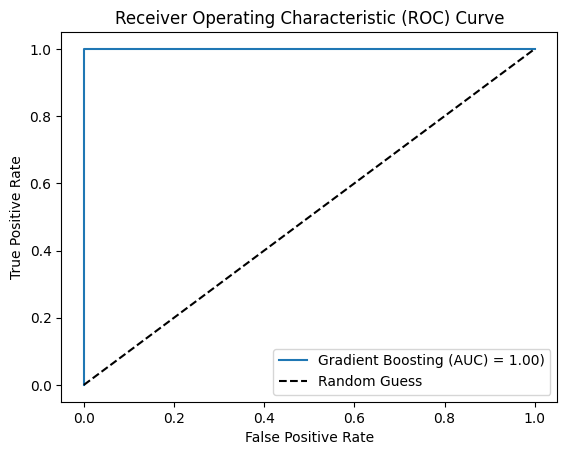

Execution Time: 0.14506864547729492 seconds
---------------------------------------
Model: K-Nearest Neighbors
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]


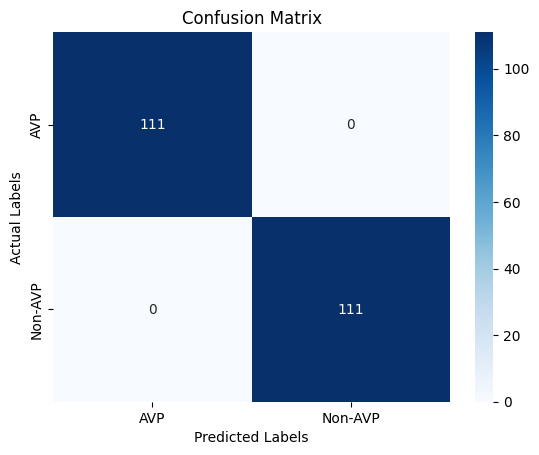

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0


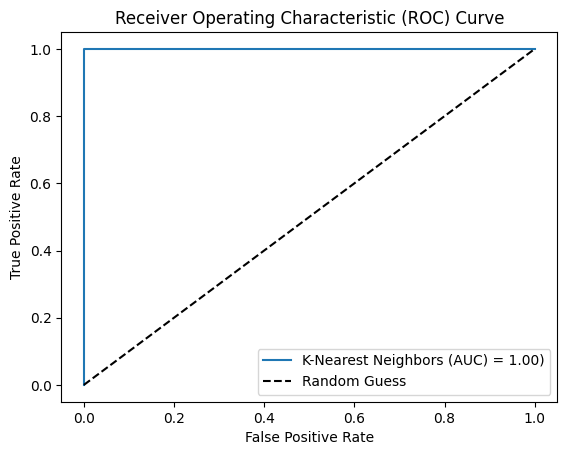

Execution Time: 0.002007722854614258 seconds
---------------------------------------
Model: Neural Network
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]


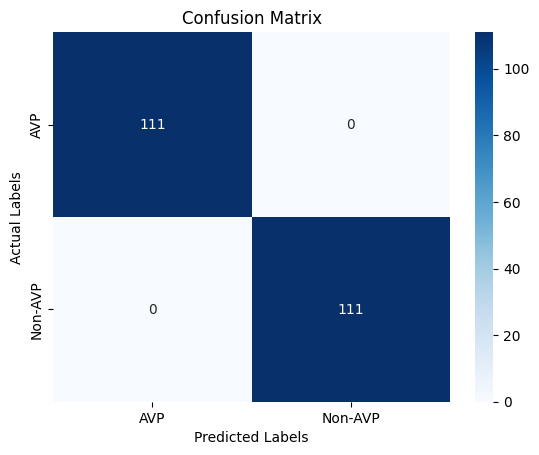

F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0


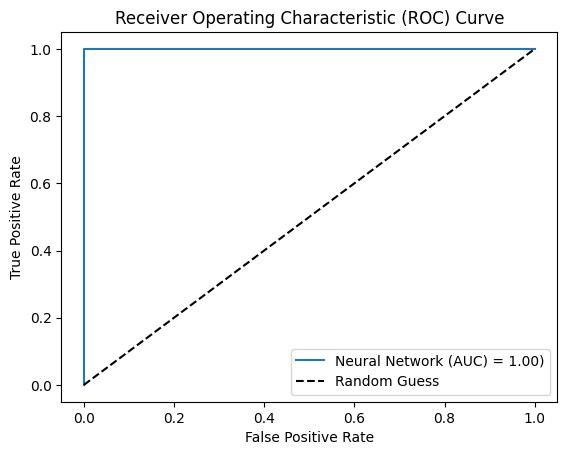

Execution Time: 2.2200870513916016 seconds
---------------------------------------


In [24]:

# Define the classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Model: {name}")
    start_time = time.time()
    classifier.fit(features_train_transformed_balanced, labels_train_balanced)
    end_time = time.time()

    # Predict the classes for the test set
    predicted_labels = classifier.predict(features_test_transformed_balanced)

    # Calculate the accuracy
    accuracy = accuracy_score(labels_test_balanced, predicted_labels)
    print(f"Accuracy: {accuracy}")

    # Create a confusion matrix
    cm = confusion_matrix(labels_test_balanced, predicted_labels)
    print(f"Confusion Matrix:\n{cm}")

    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=["AVP", "Non-AVP"], yticklabels=["AVP", "Non-AVP"])

    # Set the axis labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")

    # Display the confusion matrix
    plt.show()

    # Calculate F1 score
    f1 = f1_score(labels_test_balanced, predicted_labels)
    print(f"F1 Score: {f1}")

    # Calculate recall
    recall = recall_score(labels_test_balanced, predicted_labels)
    print(f"Recall: {recall}")

    # Calculate precision
    precision = precision_score(labels_test_balanced, predicted_labels)
    print(f"Precision: {precision}")

    # Calculate mean absolute error
    mae = mean_absolute_error(labels_test_balanced, predicted_labels)
    print(f"Mean Absolute Error: {mae}")

    # Calculate root mean squared error
    rmse = mean_squared_error(labels_test_balanced, predicted_labels, squared=False)
    print(f"Root Mean Squared Error: {rmse}")

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(labels_test_balanced, predicted_labels)
    print(f"ROC AUC Score: {roc_auc}")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(labels_test_balanced, predicted_labels)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='{} (AUC) = {:.2f})'.format(name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

    # Display the ROC curve
    plt.show()

    # Calculate execution time
    execution_time = end_time - start_time
    print(f"Execution Time: {execution_time} seconds")

    print("---------------------------------------")

# Cross Validation

In [25]:
# Train and evaluate each classifier using cross-validation
for name, classifier in classifiers.items():
    print(f"Model: {name}")

    # Perform cross-validation
    scores = cross_val_score(classifier, features_train_transformed_balanced, labels_train_balanced, cv=20)

    # Print cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Average Cross-Validation Score:", scores.mean())
    print("---------------------------------------")

Model: SVM
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0
---------------------------------------
Model: Decision Tree
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0
---------------------------------------
Model: Random Forest
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0
---------------------------------------
Model: Logistic Regression
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0
---------------------------------------
Model: Gradient Boosting
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0
---------------------------------------
Model: K-Nearest Neighbors
Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 

# Full code

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error, roc_auc_score
from scipy.sparse import hstack
import time

data = pd.read_csv('/kaggle/input/dataset-for-avp/AVPs_Dataset.csv')

# Split the data into features and labels
features = data[['Sequence', 'Protective antigenic score', 'Probable prediction (antigen/non antigen) Threshold = 0.4']]
labels = data['Property']

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)


# Convert sequences to numerical features using a vectorizer
vectorizer = CountVectorizer()
sequence_train_transformed = vectorizer.fit_transform(features_train['Sequence'])
sequence_test_transformed = vectorizer.transform(features_test['Sequence'])

# Convert 'Protective antigenic score' to a sparse matrix
score_train = features_train['Protective antigenic score'].values.reshape(-1, 1)
score_test = features_test['Protective antigenic score'].values.reshape(-1, 1)

# Perform one-hot encoding on 'Probable prediction (antigen/non antigen) Threshold = 0.4'
encoder = OneHotEncoder(sparse=False)
prediction_train = encoder.fit_transform(features_train['Probable prediction (antigen/non antigen) Threshold = 0.4'].values.reshape(-1, 1))
prediction_test = encoder.transform(features_test['Probable prediction (antigen/non antigen) Threshold = 0.4'].values.reshape(-1, 1))

# Concatenate the transformed features
features_train_transformed = hstack((sequence_train_transformed, score_train, prediction_train))
features_test_transformed = hstack((sequence_test_transformed, score_test, prediction_test))

# Train set balance
smote = SMOTE()
features_train_transformed_balanced, labels_train_balanced = smote.fit_resample(features_train_transformed, labels_train)
#Test set Balance
features_test_transformed_balanced, labels_test_balanced = smote.fit_resample(features_test_transformed, labels_test)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Model: {name}")
    start_time = time.time()
    classifier.fit(features_train_transformed_balanced, labels_train_balanced)
    end_time = time.time()

    # Predict the classes for the test set
    predicted_labels = classifier.predict(features_test_transformed_balanced)

    # Calculate the accuracy
    accuracy = accuracy_score(labels_test_balanced, predicted_labels)
    print(f"Accuracy: {accuracy}")

    # Create a confusion matrix
    cm = confusion_matrix(labels_test_balanced, predicted_labels)
    print(f"Confusion Matrix:\n{cm}")
    
    # Calculate F1 score
    f1 = f1_score(labels_test_balanced, predicted_labels)
    print(f"F1 Score: {f1}")

    # Calculate recall
    recall = recall_score(labels_test_balanced, predicted_labels)
    print(f"Recall: {recall}")

    # Calculate precision
    precision = precision_score(labels_test_balanced, predicted_labels)
    print(f"Precision: {precision}")

    # Calculate mean absolute error
    mae = mean_absolute_error(labels_test_balanced, predicted_labels)
    print(f"Mean Absolute Error: {mae}")

    # Calculate root mean squared error
    rmse = mean_squared_error(labels_test_balanced, predicted_labels, squared=False)
    print(f"Root Mean Squared Error: {rmse}")

    # Calculate roc auc score
    roc_auc = roc_auc_score(labels_test_balanced, predicted_labels)
    print(f"ROC AUC Score: {roc_auc}")
    
    # Calculate execution time
    execution_time = end_time - start_time
    print(f"Execution Time: {execution_time} seconds")

    print("---------------------------------------")

    
# Train and evaluate each classifier using cross-validation
for name, classifier in classifiers.items():
    print(f"Model: {name}")

    # Perform cross-validation
    scores = cross_val_score(classifier, features_train_transformed_balanced, labels_train_balanced, cv=20)

    # Print cross-validation scores
    print("Cross-Validation Scores:", scores)
    print("Average Cross-Validation Score:", scores.mean())
    print("---------------------------------------")

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: SVM
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]
F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0
Execution Time: 0.011064529418945312 seconds
---------------------------------------
Model: Decision Tree
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]
F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0
Execution Time: 0.0017096996307373047 seconds
---------------------------------------
Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]
F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC Score: 1.0
Execution Time: 0.25591588020324707 seconds
---------------------------------------
Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
[[111   0]
 [  0 111]]
F1 Score: 1.0
Recall: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
ROC AUC 

# Result Prediction

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Load and preprocess the data
data = pd.read_csv('/kaggle/input/dataset-for-avp/AVPs_Dataset.csv')

# Split the data into features and labels
features = data[['Sequence', 'Protective antigenic score', 'Probable prediction (antigen/non antigen) Threshold = 0.4']]
labels = data['Property']

# Convert sequences to numerical features using a vectorizer
vectorizer = CountVectorizer()
sequence_transformed = vectorizer.fit_transform(features['Sequence'])

# Convert 'Protective antigenic score' to a sparse matrix
score = features['Protective antigenic score'].values.reshape(-1, 1)

# Perform one-hot encoding on 'Probable prediction (antigen/non antigen) Threshold = 0.4'
encoder = OneHotEncoder(sparse=False)
prediction = encoder.fit_transform(features['Probable prediction (antigen/non antigen) Threshold = 0.4'].values.reshape(-1, 1))

# Concatenate the transformed features
features_transformed = hstack((sequence_transformed, score, prediction))

# Define the classifiers
classifiers = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

# Train each classifier
trained_classifiers = {}
for name, classifier in classifiers.items():
    classifier.fit(features_transformed, labels)
    trained_classifiers[name] = classifier

# Manually provided feature values
sequence = "ACGTEABRAET"
score = 0.8
prediction = "ANTIGEN"

# Transform the input features
sequence_transformed = vectorizer.transform([sequence])
score_transformed = [[score]]
prediction_transformed = encoder.transform([[prediction]])

# Concatenate the transformed features
input_features = hstack((sequence_transformed, score_transformed, prediction_transformed))

# Use all models to make predictions
for name, classifier in trained_classifiers.items():
    predicted_label = classifier.predict(input_features)
    if(predicted_label[0]==0):
        a="Not Antiviral Peptides"
    else:
        a="Antiviral Peptides"
    print(f"Predicted Class using {name}: {a}\n")
    

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Predicted Class using SVM: Antiviral Peptides

Predicted Class using Decision Tree: Antiviral Peptides

Predicted Class using Random Forest: Antiviral Peptides

Predicted Class using Logistic Regression: Antiviral Peptides

Predicted Class using Gradient Boosting: Antiviral Peptides

Predicted Class using K-Nearest Neighbors: Antiviral Peptides

Predicted Class using Neural Network: Antiviral Peptides

